## Проект: создаём систему управления лифтами на Python

Запускаем два лифта в многоэтажке

Разработчики пишут программы для веб-приложений, игр, аналитики и управления ракетами. Но: в простых повседневных вещах тоже нужен код, и его тоже должен кто-то писать. Сегодня напишем один из таких полезных проектов — систему управления лифтами в 11-этажном доме и визуализацию для этой системы. В конце получится так:

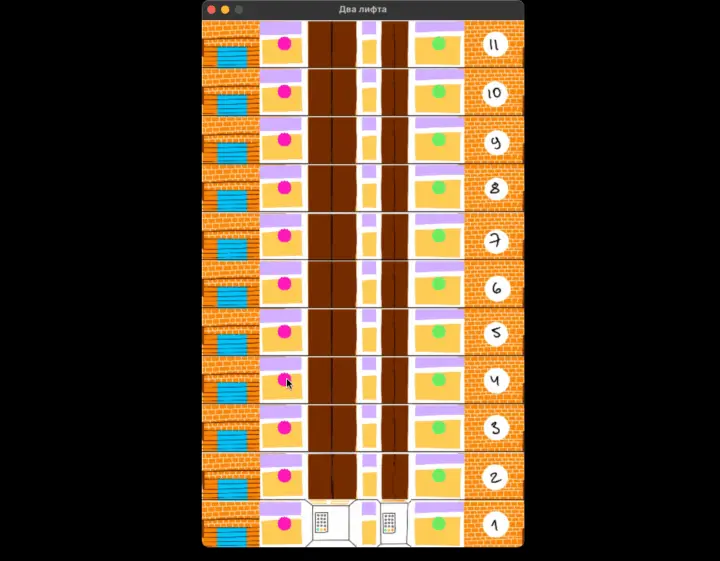

**Что сделаем**

Для начала создадим простую систему:

- здание в 11 этажей;
- грузовой и обычный лифты;
- каждый лифт вызывается по своей кнопке.


Для создания элементов нашего лифтового узла используем объектно-ориентированное программирование: сделаем классы для лифтов, кнопок и этажей и у каждого класса настроим свои атрибуты и методы, например передвижение на нужный этаж. А потом всё это свяжем одной функцией для запуска.
Делаем тетрис на Python

Для визуализации подключим библиотеку pygame. Она используется для написания несложных игр на Python и идеально подойдёт для интерактивной визуализации передвижения двух лифтов. В каждый объект-элемент мы добавим изображение, чтобы видеть работу лестничного узла.

In [16]:
import pygame

### Готовим настройки визуализации
Сначала зададим основные настройки для всех видимых объектов.

Главное окно, лифты, кнопки и этажи будут одного размера. Пропишем это в переменных-константах, которые напишем заглавными буквами (чтобы сразу было понятно, ЧТО ЭТО КОНСТАНТЫ). Здесь же добавляем настройки чёрного цвета для линии разделения этажей:

In [17]:
# задаём константы для неизменяющихся значений
SCREEN_WIDTH = 470
SCREEN_HEIGHT = 770
FLOOR_COUNT = 11
FREIGHT_ELEVATOR_WIDTH = 75
ELEVATOR_WIDTH = 50
ELEVATOR_HEIGHT = 70
BUTTON_SIZE = 20
FLOOR_HEIGHT = 70
# константа чёрного цвета
BLACK = (0, 0, 0)

Чтобы пользоваться всеми возможностями pygame, библиотеку надо инициализировать:

In [18]:
# инициализируем модули pygame
pygame.init()

(5, 0)

Создаём окно для визуализации и указываем название:

In [19]:
# создаём объект для главного экрана
# с указанием ширины и высоты
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
# указываем название для главного окна
pygame.display.set_caption('Два лифта')

Для всех объектов мы заранее подготовили изображения — [скачать их можно одним архивом](https://thecode.media/wp-content/uploads/2024/12/archive.zip). Загружаем их в отдельные переменные и конвертируем изображения .png с прозрачным фоном, чтобы pygame корректно их обрабатывал:

In [20]:
# загружаем изображения
# картинка для лифта
elevator_img = pygame.image.load('Data/elevator.jpg')
# картинка для красной кнопки
button_red_img = pygame.image.load('Data/button1_elevator1.png').convert_alpha()
# картинка для синей кнопки
button_blue_img = pygame.image.load('Data/button1_elevator2.png').convert_alpha()
# картинка для грузового лифта
freight_elevator_img = pygame.image.load('Data/freight_elevator.jpg')
# картинка для фона
back_img = pygame.image.load('Data/back.jpg')

На всякий случай, если какие-то изображения получились больше или меньше нужных, масштабируем их под заданные в константах размеры:

In [21]:
# масштабируем изображения под заданные в константах размеры
elevator_img = pygame.transform.scale(elevator_img, (ELEVATOR_WIDTH, ELEVATOR_HEIGHT))
button_red_img = pygame.transform.scale(button_red_img, (BUTTON_SIZE, BUTTON_SIZE))
button_blue_img = pygame.transform.scale(button_blue_img, (BUTTON_SIZE, BUTTON_SIZE))
freight_elevator_img = pygame.transform.scale(freight_elevator_img, (FREIGHT_ELEVATOR_WIDTH, ELEVATOR_HEIGHT))
back_img = pygame.transform.scale(back_img, (SCREEN_WIDTH, SCREEN_HEIGHT))

### Создаём кнопки вызова
Все части системы мы будем создавать в виде объектов, поэтому кратко вспомним, что это такое.

Объекты — основная единица объектно-ориентированного программирования. Для их создания нам нужно настроить класс. Это шаблон, по которому будут создаваться новые объекты. Если хотите лучше в этом разобраться, [держите статью про ООП](https://thecode.media/new-oop-class/).

У класса и его объектов есть атрибуты и методы. Если сильно упростить, то атрибуты — это свойства класса. Например, у наших кнопок будут атрибуты координат расположения на главном экране, свойство для загрузки картинки из файла и свойство действия, в которое мы передадим функцию вызова лифта.

Атрибуты указываются в функции-конструкторе __init__:

Методы — то, что умеет делать объект, более сложные наборы команд. У наших кнопок будут два метода: первый станет отрисовывать их на главном экране, а второй — вызывать атрибут action, когда пользователь кликнул по кнопке:

In [22]:
# класс Кнопок вызова
class Button:
   # конструктор __init__ создаёт кнопку
   def __init__(self, x, y, image, action):
       # рисуем прямоугольник с заданными координатами
       self.rect = pygame.Rect(x, y, BUTTON_SIZE, BUTTON_SIZE)
       # в прямоугольник вписываем изображение
       self.image = image
       # привязываем кнопку к функции, которую укажем при создании кнопки
       self.action = action

   # метод для отрисовки кнопки на главном экране с заданными координатами
   def draw(self, screen):
       # метод blit рисует новый объект на изображении screen
       screen.blit(self.image, (self.rect.x, self.rect.y))

   # метод проверки нажатия кнопки
   def check_click(self, pos):
       # collidepoint проверяет действие курсора
       if self.rect.collidepoint(pos):
           # если пользователь кликнул на кнопку,
           # включаем указанную при создании функцию
           self.action()

### Создаём этажи
Этаж в нашем проекте — просто абстракция из жизни. Это значит, что он есть в коде, но явного выражения не имеет, кроме координат лифта при отрисовке. У этажа есть номер, есть кнопки и положения для лифтов. Ещё на каждом этаже мы нарисуем линию разграничения, чтобы было проще воспринимать разделение визуализации.

В качестве атрибутов мы укажем номер и объекты лифтов. Ещё при создании каждого этажа будем создавать по две кнопки, у которых будут одинаковые координаты по оси X, но разные по Y, чтобы они располагались одна над другой, как на настоящих этажах.

Ещё кнопки надо привязать к лифтам. Мы сделаем это через лямбда-функцию (и вспомним, как она работает). Получается такой конструктор:

Что такое лямбда-функция: это безымянная, чаще всего короткая функция, которая присваивается переменным. После этого можно вызвать переменную и получить возвращаемое значение из функции.

Лямбда-функции в объектах кнопок — методы из класса лифтов. Мы их пока ещё не создали, но уже договорились, что в классе лифтов будет метод set_target для установки целевого этажа, на который он поедет при нажатии на кнопку.

Лямбда-функция *elevator1.set_target* и *elevator2.set_target* — это тот самый атрибут action, который указывается при создании объектов класса *Button*.

Чтобы этажи и кнопки появились на главном экране, их надо отрисовать. Для этого в класс *Floor* добавим метод *draw*. Внутри метода мы на высоте каждого этажа нарисуем линию для разграничения и кнопки, вызывая метод draw у объектов кнопок командой *button.draw()*:

In [23]:
# класс Этажей
# создаёт этаж с кнопками для вызова двух лифтов
# их координаты зависят от номера этажа (y)
class Floor:
   # конструктор __init__ создаёт этаж
   def __init__(self, y, elevator1, elevator2):
       # передаём номер этажа
       self.y = y
       # передаём на каждый этаж по два объекта кнопок,
       # размещаем на нужных местах соответственно этажу
       # и привязываем к нужному лифту через лямбда-функцию
       self.buttons = [
           Button(110, y + FLOOR_HEIGHT // 2 - BUTTON_SIZE // 2, button_red_img, lambda: elevator1.set_target(y)),
           Button(335, y + FLOOR_HEIGHT // 2 - BUTTON_SIZE // 2, button_blue_img, lambda: elevator2.set_target(y)),
       ]

   # метод отрисовки этажа и кнопки
   def draw(self, screen):
       # рисуем линию на главном экране с толщиной 1
       # от нулевой координаты до конца
       # экрана по оси х и на высоте этаже y
       pygame.draw.line(screen, BLACK, (0, self.y), (SCREEN_WIDTH, self.y), 1)
       # рисуем кнопки на каждом этаже
       for button in self.buttons:
           button.draw(screen)

### Создаём лифты
Если этажей у нас 11 и на каждом по две кнопки, то лифтов тоже пусть пока будет два.

У каждого из лифтов есть начальные координаты, ширина и высота, изображение, целевой этаж и скорость. Все эти атрибуты указываем при создании объекта класса:

Ещё у нашего лифта есть два метода: передвижение и отрисовки на экране. Для передвижения сделаем условие: пока координата лифта не равна целевому этажу, она уменьшается или увеличивается на величину скорости, в зависимости от того, едет лифт вверх или вниз:

In [24]:
# класс Лифта
# определяем лифт с координатами, размерами и изображением
class Elevator:
   def __init__(self, x, y, width, height, image):
       # начальные координаты
       self.x = x
       self.y = y
       # размеры лифта
       self.width = width
       self.height = height
       # изображение
       self.image = image
       # target_y задаёт этаж, куда должен ехать лифт
       self.target_y = y
       # скорость лифта
       self.speed = 2

   # метод для движения лифтов
   def move(self):
       # если лифт находится ниже этажа нажатой кнопки...
       if self.y < self.target_y:
           # координата лифта увеличивается с установленной скоростью
           self.y += self.speed
       # если лифт находится выше этажа нажатой кнопки...
       elif self.y > self.target_y:
           # координата лифта уменьшается с установленной скоростью
           self.y -= self.speed

   # метод для отрисовки лифтов на главном экране
   def draw(self, screen):
       screen.blit(self.image, (self.x, self.y))

### Проверяем, что получается
Попробуем отрисовать наш дом на промежуточном этапе, просто чтобы посмотреть, что получается. Для этого создадим массив с лифтами и этажами и разместим его на главном экране через временный цикл. Этот код нужен только для проверки работоспособности, в финальном варианте его не будет:

In [25]:
# floors = [
#    Floor(SCREEN_HEIGHT - FLOOR_HEIGHT * (i + 1), None, None)
#    for i in range(FLOOR_COUNT)
# ]

# running = True
# while running:
#    screen.blit(back_img, (0, 0))
#    for floor in floors:
#        floor.draw(screen)
#    pygame.display.flip()
#    for event in pygame.event.get():
#        if event.type == pygame.QUIT:
#            running = False
# pygame.quit()

### Создаём общий класс для системы
Всю систему лифтового узла тоже опишем одним классом, в котором мы объединим всё, что уже подготовили. Для этого в основном конструкторе создадим два атрибута для двух лифтов и нарисуем этажи в таком количестве, в каком они указаны в начальной константе FLOOR_COUNT:

In [26]:
# класс для создания всей Системы Лифтов
class ElevatorSystem:
   def __init__(self):
       # cоздаём два лифта: грузовой и пассажирский
       self.elevator1 = Elevator(150, SCREEN_HEIGHT - FLOOR_HEIGHT,
                                 FREIGHT_ELEVATOR_WIDTH, ELEVATOR_HEIGHT, freight_elevator_img)
       self.elevator2 = Elevator(255, SCREEN_HEIGHT - FLOOR_HEIGHT,
                                 ELEVATOR_WIDTH, ELEVATOR_HEIGHT, elevator_img)
       # создаём массив этажей
       self.floors = [
           Floor(SCREEN_HEIGHT - FLOOR_HEIGHT * (i + 1), self.elevator1, self.elevator2)
           for i in range(FLOOR_COUNT)
       ]
# Для обновления положений лифтов будет использоваться метод update(). Он будет активировать метод move() у объектов класса Elevator:
   # метод обновления положения лифтов, созданный в классе Elevator
   def update(self):
       self.elevator1.move()
       self.elevator2.move()

   # метод отрисовки объектов
   def draw(self, screen):
       # рисуем этажи через метод draw класса Floor
       for floor in self.floors:
           floor.draw(screen)
       # рисуем лифты через метод draw класса Elevator
       self.elevator1.draw(screen)
       self.elevator2.draw(screen)


### Устанавливаем нужный этаж в лифте
Отдельно создаём функцию, которая будет устанавливать целевой этаж для лифта:

In [27]:
# функция для установки целевого этажа для лифта
def elevator_set_target(self, y):
   self.target_y = y

Присвоим её методу set_target в классе Elevator:

In [28]:
# устанавливаем целевой этаж в объект Лифта
Elevator.set_target = elevator_set_target

### Создаём основную логику приложения
Сейчас напишем функцию, которая запустит визуализацию и систему лифтов.

Чтобы всё заработало, в pygame нужно создать объект частоты обновления кадров и переменную-флаг. Пока флаг равен True, будет работать основной цикл.

Создаём переменные обновления кадров, флага для цикла и системы лифтов:

In [29]:
# основная функция
def main():
   # объект частоты обновления экрана
   clock = pygame.time.Clock()
   # флаг-метка для работы главного цикла
   running = True
   # создаём объект класса Системы Лифтов
   system = ElevatorSystem()

   # пока флаг-метка равен True, работает цикл всей системы
   while running:
       # отрисовываем фон
       screen.blit(back_img, (0, 0))

       # проверяем список событий при запущенной программе
       for event in pygame.event.get():
           # если пользователь закрыл главное окно...
           if event.type == pygame.QUIT:
               # завершаем цикл
               running = False
           # если пользователь кликнул мышкой...
           elif event.type == pygame.MOUSEBUTTONDOWN:
               # сохраняем координаты клика в переменную pos
               pos = pygame.mouse.get_pos()
               # проверяем все этажи и кнопки для проверки,
               # совпадают ли координаты клика с одной из кнопок
               for floor in system.floors:
                   for button in floor.buttons:
                       button.check_click(pos)

       # обновляет состояние лифтов
       system.update()
       # отрисовывает лифты на нужных позициях
       system.draw(screen)
       # обновляем изображение для пользователя, создавая анимацию
       pygame.display.flip()
       # устанавливаем скорость обновления кадров до 30 в секунду
       clock.tick(30)

   # завершаем работу после окончания цикла
   pygame.quit()

In [30]:
# запускаем главную функцию
main()